In [2]:
import numpy as np
import pandas as pd

df = pd.DataFrame(

    {
        'A': [1, np.nan, 3, 4, 5],
        'B': [6, 7, 8, np.nan, 10],
        'C': [11, 12, 13, 14, 15]
    
}

)

df

,A,B,C
0,1.0,6.0,11
1,NaN,7.0,12
2,3.0,8.0,13
3,4.0,NaN,14
4,5.0,10.0,15


In [3]:
df.isnull()

,A,B,C
0,False,False,False
1,True,False,False
2,False,False,False
3,False,True,False
4,False,False,False


In [4]:
# imputer廃止、fillnaを使用する

import pandas as pd

df.fillna(df.mean())

,A,B,C
0,1.00,6.00,11
1,3.25,7.00,12
2,3.00,8.00,13
3,4.00,7.75,14
4,5.00,10.00,15


In [5]:
# 1つめのカンマ忘れがち

df = pd.DataFrame(
    
    {
    'A': [1, 2, 3, 4, 5],
    'B': ['a', 'b', 'a', 'b', 'c']
    })

df

,A,B
0,1,a
1,2,b
2,3,a
3,4,b
4,5,c


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['B'])
le.transform(df['B'])

array([0, 1, 0, 1, 2])

In [7]:
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [8]:
df

,A,B
0,1,a
1,2,b
2,3,a
3,4,b
4,5,c


In [9]:
# これでB列のアルファベットを数字にする

df['B'] = le.fit_transform(df['B'])

df

,A,B
0,1,0
1,2,1
2,3,0
3,4,1
4,5,2


In [10]:
# dfではなくpd.get_dummies

df_ohe = pd.get_dummies(df.loc[:, 'B'])

df_ohe

,0,1,2
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,0,1


In [10]:
df = pd.DataFrame(
    {
        'A': [1, 2, 3, 4, 5],
        'B': [100, 200, 400, 500, 800]
    }
)

df

,A,B
0,1,100
1,2,200
2,3,400
3,4,500
4,5,800


In [11]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

stdsc.fit(df)

stdsc.transform(df)

array([[-1.41421356, -1.22474487],
       [-0.70710678, -0.81649658],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.40824829],
       [ 1.41421356,  1.63299316]])

In [12]:
# 上は全体の値に対して分散正規化（標準化）をしている
# 一方で下記は、列A,Bに対する標準偏差を求めているだけ

df.std()

A      1.581139
B    273.861279
dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler

mmsc = MinMaxScaler()

mmsc.fit(df)
mmsc.transform(df)

array([[0.        , 0.        ],
       [0.25      , 0.14285714],
       [0.5       , 0.42857143],
       [0.75      , 0.57142857],
       [1.        , 1.        ]])

In [14]:
# 変数Xが大文字なのは説明変数（特徴量）がいくつかあるのを1つのXとしてまとめているからである

from sklearn.datasets import load_iris

iris = load_iris()

X, y = iris.data, iris.target

print('X:')
print(X[:5, :])
print('y:')
print(y[:5])

# yには正解ラベルがある（今回は全てsetosa）
# Xには、がくや花びらの長さや幅が4つの説明変数で格納されている（4つの説明変数の集合体）
# Xの列数 = 説明変数の数
# あとはこれらを学習データとテストデータに分割しているだけ

# これを y_train = aX_train +b　の関係性を見出し
# この式に X_testを代入してy_predを求め、y_test（正解データ、目的変数はデータが1つ）とどのくらい近いのかを確かめる

X:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y:
[0 0 0 0 0]


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# これにより、目的変数yに対して、説明変数X（x1, x2, x3, x4）にいくつ特徴量があるのかを確かめられる
# 150個のデータが105:45で、トレーニングデータとテストデータに分けられた

(105, 4)
(45, 4)
(105,)
(45,)


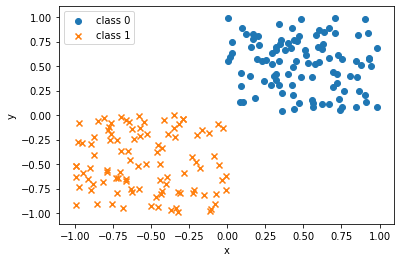

In [16]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

x0 = np.random.uniform(size = (100, 2))

# repeat は uniformという関数だけをパクっている（中身の引数はパクっていない）
y0 = np.repeat(0, 100)

x1 = np.random.uniform(-1.0, 0.0, size =(100, 2))

y1 = np.repeat(1,100)

fig, ax = plt.subplots()

ax.scatter(x0[:, 0], x0[:, 1], marker = 'o', label = 'class 0')

ax.scatter(x1[:, 0], x1[:, 1], marker = 'x', label = 'class 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.legend()

plt.show()

In [17]:
y0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

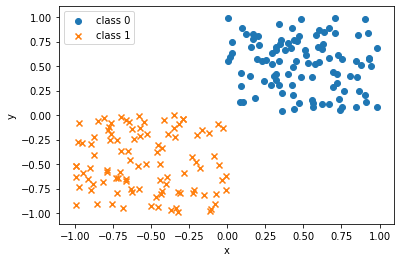

In [18]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

X0 = np.random.uniform(size = (100, 2))
y0 = np.repeat(0, 100)

X1 = np.random.uniform(-1.0, 0.0, size =(100, 2))
y1 = np.repeat(1,100)

fig, ax = plt.subplots()

ax.scatter(X0[:, 0], X0[:, 1], marker = 'o', label = 'class 0')

ax.scatter(X1[:, 0], X1[:, 1], marker = 'x', label = 'class 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.legend()

plt.show()

In [19]:
from sklearn.svm import SVC

# 下記のような条件であるとき、svcのプロットを行う「インスタンスの作成」
def plot_boundary_margin_sv(X0, y0, X1, y1, kernel, C, xmin= -1, xmax = 1, ymin = -1, ymax = 1):
    svc = SVC(kernel=kernel, C=C)
    
    # 学習させる
    # =と.を間違える癖がある、気を付けること
    svc.fit(np.vstack((X0, X1)), np.hstack((y0, y1)))
    
    fig, ax = plt.subplots()
    
    # プロットの設定を行う
    ax.scatter(X0[:, 0], X0[:, 1], marker = 'o', label = 'class 0')
    ax.scatter(X1[:, 0], X1[:, 1], marker = 'x', label = 'class 1')
    
    # 決定協会とマージンをプロット
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100, 100))
    ax.contour(xx, yy, p,
               colors='k', levels=[-1, 0, 1],
               alpha=0.5, linestyles=['--', '-', '--'])
    
    # サポートベクタをプロット
    ax.scatter(svc.support_vectors_[:, 0],
               svc.support_vectors_[:, 1],
               s=250, facecolors='none',
              edgecolors='black')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='best')
    plt.show()

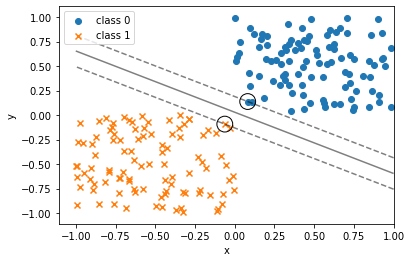

In [20]:
# 実際にプロットしてみる

plot_boundary_margin_sv(X0, y0, X1, y1, kernel='linear', C=1e6)

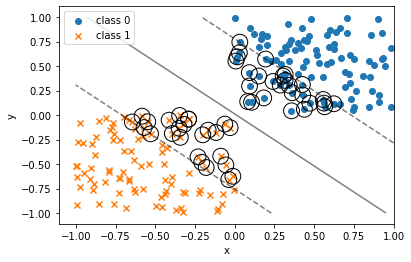

In [21]:
# Cの大きさはマージン大きさを調整する

plot_boundary_margin_sv(X0, y0, X1, y1, kernel = 'linear', C = 0.1)

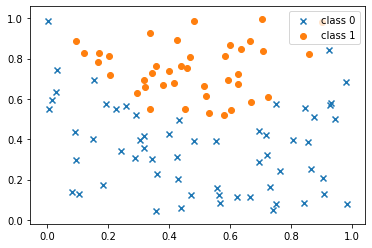

In [22]:
np.random.seed(123)

X = np.random.random(size = (100, 2))

y = (X[:, 1] > 2*(X[:, 0] - 0.5) ** 2 + 0.5).astype(int)

fig, ax = plt.subplots()

ax.scatter(X[y == 0, 0], X[y == 0, 1], marker = 'x', label = 'class 0')
ax.scatter(X[y == 1, 0], X[y == 1, 1], marker = 'o', label = 'class 1')

ax.legend()
plt.show()

In [23]:
X[y == 0, 0]

array([0.69646919, 0.22685145, 0.71946897, 0.9807642 , 0.4809319 ,
       0.43857224, 0.18249173, 0.72244338, 0.36178866, 0.09210494,
       0.43086276, 0.42583029, 0.94416002, 0.62395295, 0.31728548,
       0.86630916, 0.34276383, 0.87545684, 0.84234244, 0.76368284,
       0.19422296, 0.01612921, 0.55678519, 0.15307052, 0.55438325,
       0.92513249, 0.35739757, 0.30476807, 0.15112745, 0.2408559 ,
       0.10590849, 0.84650623, 0.85445249, 0.3167879 , 0.00268806,
       0.90534158, 0.29248941, 0.25754206, 0.80696868, 0.73107304,
       0.98352161, 0.42834727, 0.09332671, 0.92758424, 0.74186215,
       0.28653662, 0.66526147, 0.69631127, 0.565642  , 0.750717  ,
       0.75164399, 0.90987166, 0.08178009, 0.39937871, 0.56221838,
       0.00742638, 0.93193215, 0.02931972, 0.03219793, 0.472913  ])

In [24]:
X[y == 0, 1]

array([0.28613933, 0.55131477, 0.42310646, 0.68482974, 0.39211752,
       0.0596779 , 0.17545176, 0.32295891, 0.22826323, 0.43370117,
       0.4936851 , 0.31226122, 0.50183668, 0.1156184 , 0.41482621,
       0.25045537, 0.30412079, 0.51042234, 0.08319499, 0.24366637,
       0.57245696, 0.59443188, 0.15895964, 0.69552953, 0.38895057,
       0.84167   , 0.04359146, 0.39818568, 0.39887629, 0.34345601,
       0.13089495, 0.55325734, 0.38483781, 0.35426468, 0.98834542,
       0.20763586, 0.52001015, 0.56435904, 0.39437005, 0.16106901,
       0.07936579, 0.20454286, 0.29686078, 0.56900373, 0.04857903,
       0.30646975, 0.11139217, 0.44032788, 0.08490416, 0.57406383,
       0.07914896, 0.1286312 , 0.13841557, 0.42430686, 0.12224355,
       0.55159273, 0.58217546, 0.63590036, 0.74478066, 0.12175436])

In [25]:
X[y == 1, 0]

array([0.34317802, 0.39804426, 0.53155137, 0.63440096, 0.72445532,
       0.29371405, 0.42635131, 0.48303426, 0.51948512, 0.12062867,
       0.60306013, 0.41702221, 0.66931378, 0.6249035 , 0.09571252,
       0.62724897, 0.31876643, 0.70495883, 0.35591487, 0.59317692,
       0.51312815, 0.32198061, 0.17108183, 0.33867085, 0.57855147,
       0.90191137, 0.60069857, 0.45063649, 0.457412  , 0.7086974 ,
       0.16593788, 0.66487245, 0.43821438, 0.58267109, 0.33706638,
       0.85938908, 0.2013995 , 0.46798757, 0.20609573, 0.37898585])

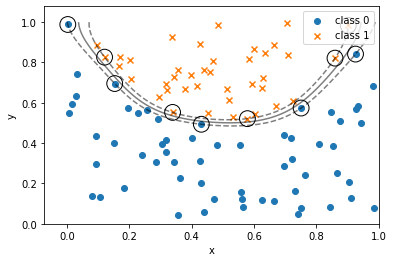

In [26]:
X0, X1 = X[y == 0, :], X[y == 1, :]
y0, y1 = y[y == 0], y[y == 1]
plot_boundary_margin_sv(X0, y0, X1, y1, kernel = 'rbf', C = 1e3, xmin = 0, ymin = 0)

In [27]:
# 決定木の作成

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

tree = DecisionTreeClassifier(max_depth = 3)

tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, filled = True,
                           rounded = True,
                           class_names = ['Setosa', 'Versicolor', 'Virginica'],
                           feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'],
                           out_file = None)


# 決定木を出力する
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

In [35]:
y_pred = tree.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [39]:
# ランダムフォレストのモジュールをインポート
from sklearn.ensemble import RandomForestClassifier

#　ランダムフォレストのインスタンス（実行機）を作成
forest = RandomForestClassifier(n_estimators = 100, random_state = 123)

# 学習させ、モデルを作成
forest.fit(X_train, y_train)

# 作成したモデルに、X_testを入れる
y_pred = forest.predict(X_test)

# 予測値を出力
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [47]:
# モジュールの準備
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [54]:
# データの準備
boston = load_boston()

# Xの小文字ミス
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [57]:
# インスタンスの作成
# ( )の付け忘れ
lr = LinearRegression()

# 学習させる
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
y_pred = lr.predict(X_test)

In [59]:
y_pred

array([15.4757088 , 27.85786595, 39.71821366, 17.94591734, 30.19441873,
       37.51057831, 25.20492485, 11.29301795, 13.93325033, 32.10798674,
       28.51346127, 19.10242965, 14.16909335, 30.59883198, 16.91765089,
       21.57521646, 20.56956106, 38.0388848 , 18.28489886, 15.44455502,
       13.942728  , 22.89202676, 33.08289616, 38.85747118, 29.91747968,
       22.34030137, 17.88075723, 20.6598468 , 23.37690089, 20.51319684,
       25.78620928, 33.83339852, 15.33132641, 21.79161378, 24.14376798,
       35.2106862 , 29.20302521, 18.566505  , 13.9622867 , 38.63492008,
       31.18122326, 19.10959362, 19.1273964 , 39.74779582,  8.86534866,
       27.28051165, 19.04476095, 25.44873252, 15.50076478, 26.17581245,
       33.69571146, 24.40124874, 19.39414746, 12.55330545, 24.50462883,
       18.21889479, 10.63052092,  2.28680811, 31.72266364, 13.46355579,
       20.09462113, 22.38725561, 19.98251601, 17.86587813, 24.34154548,
       26.93269765, 25.82034717, 22.2255162 , 24.67832008, 30.36

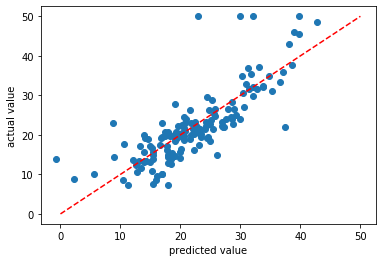

In [69]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(y_pred, y_test)

ax.plot((0, 50), (0, 50), linestyle = 'dashed', color = 'red')

ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')

plt.show()

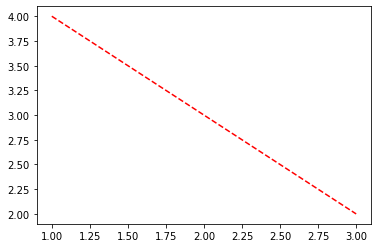

In [70]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# (x1, x2), (y1, y2)のコードを入力　→　(x1, y1),(x2, y2)を結ぶプロットが表示される
# xとyは別々に書かなければいけないという意識を持っておくと良い

ax.plot((1, 3), (4, 2), linestyle = 'dashed', color = 'red')


plt.show()

In [80]:
import pandas as pd

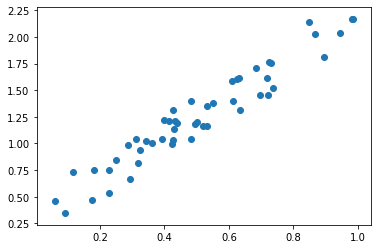

In [71]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

X = np.random.random(size = 50)

Y = 2*X + 0.5 * np.random.rand(50)

fig, ax = plt.subplots()

ax.scatter(X, Y)

plt.show()

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

# XとYについて行を全て列に直して、横連結する
X_pca = pca.fit_transform(np.hstack((X[:, np.newaxis], Y[:, np.newaxis])))

In [73]:
X

array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
       0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752,
       0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426,
       0.73799541, 0.18249173, 0.17545176, 0.53155137, 0.53182759,
       0.63440096, 0.84943179, 0.72445532, 0.61102351, 0.72244338,
       0.32295891, 0.36178866, 0.22826323, 0.29371405, 0.63097612,
       0.09210494, 0.43370117, 0.43086276, 0.4936851 , 0.42583029,
       0.31226122, 0.42635131, 0.89338916, 0.94416002, 0.50183668,
       0.62395295, 0.1156184 , 0.31728548, 0.41482621, 0.86630916,
       0.25045537, 0.48303426, 0.98555979, 0.51948512, 0.61289453])

In [83]:
dfX = pd.DataFrame(X)
dfX

,0
0,0.696469
1,0.286139
2,0.226851
3,0.551315
4,0.719469
5,0.423106
6,0.980764
7,0.684830
8,0.480932
9,0.392118


In [74]:
Y

array([1.4532527 , 0.98544907, 0.75523297, 1.37516354, 1.61031986,
       0.99827331, 2.1700395 , 1.71030986, 1.39959222, 1.03944621,
       1.02101292, 1.75106769, 1.18959624, 0.45670032, 1.21725973,
       1.51758831, 0.74682488, 0.4727367 , 1.16021423, 1.34988365,
       1.31665818, 2.141527  , 1.76253514, 1.5837552 , 1.45295137,
       0.94313377, 1.00196991, 0.53600628, 0.66396335, 1.60971701,
       0.34359309, 1.21338749, 1.13891715, 1.18184548, 1.31422683,
       1.04535744, 1.0314014 , 1.80857406, 2.04070407, 1.20276619,
       1.60038532, 0.72891603, 0.8125284 , 1.21092633, 2.02920677,
       0.84676163, 1.04163225, 2.17055772, 1.15939819, 1.39751706])

In [84]:
dfY = pd.DataFrame(Y)
dfY

,0
0,1.453253
1,0.985449
2,0.755233
3,1.375164
4,1.610320
5,0.998273
6,2.170040
7,1.710310
8,1.399592
9,1.039446


In [87]:
X[:, np.newaxis]

array([[0.69646919],
       [0.28613933],
       [0.22685145],
       [0.55131477],
       [0.71946897],
       [0.42310646],
       [0.9807642 ],
       [0.68482974],
       [0.4809319 ],
       [0.39211752],
       [0.34317802],
       [0.72904971],
       [0.43857224],
       [0.0596779 ],
       [0.39804426],
       [0.73799541],
       [0.18249173],
       [0.17545176],
       [0.53155137],
       [0.53182759],
       [0.63440096],
       [0.84943179],
       [0.72445532],
       [0.61102351],
       [0.72244338],
       [0.32295891],
       [0.36178866],
       [0.22826323],
       [0.29371405],
       [0.63097612],
       [0.09210494],
       [0.43370117],
       [0.43086276],
       [0.4936851 ],
       [0.42583029],
       [0.31226122],
       [0.42635131],
       [0.89338916],
       [0.94416002],
       [0.50183668],
       [0.62395295],
       [0.1156184 ],
       [0.31728548],
       [0.41482621],
       [0.86630916],
       [0.25045537],
       [0.48303426],
       [0.985

In [93]:
Y[:, np.newaxis]

array([[1.4532527 ],
       [0.98544907],
       [0.75523297],
       [1.37516354],
       [1.61031986],
       [0.99827331],
       [2.1700395 ],
       [1.71030986],
       [1.39959222],
       [1.03944621],
       [1.02101292],
       [1.75106769],
       [1.18959624],
       [0.45670032],
       [1.21725973],
       [1.51758831],
       [0.74682488],
       [0.4727367 ],
       [1.16021423],
       [1.34988365],
       [1.31665818],
       [2.141527  ],
       [1.76253514],
       [1.5837552 ],
       [1.45295137],
       [0.94313377],
       [1.00196991],
       [0.53600628],
       [0.66396335],
       [1.60971701],
       [0.34359309],
       [1.21338749],
       [1.13891715],
       [1.18184548],
       [1.31422683],
       [1.04535744],
       [1.0314014 ],
       [1.80857406],
       [2.04070407],
       [1.20276619],
       [1.60038532],
       [0.72891603],
       [0.8125284 ],
       [1.21092633],
       [2.02920677],
       [0.84676163],
       [1.04163225],
       [2.170

In [91]:
df_axisX = pd.DataFrame(X[:, np.newaxis])
df_axisX

,0
0,0.696469
1,0.286139
2,0.226851
3,0.551315
4,0.719469
5,0.423106
6,0.980764
7,0.684830
8,0.480932
9,0.392118


In [86]:
xy = pd.DataFrame(np.hstack((X[:, np.newaxis], Y[:, np.newaxis])))
xy

,0,1
0,0.696469,1.453253
1,0.286139,0.985449
2,0.226851,0.755233
3,0.551315,1.375164
4,0.719469,1.610320
5,0.423106,0.998273
6,0.980764,2.170040
7,0.684830,1.710310
8,0.480932,1.399592
9,0.392118,1.039446


In [96]:
np.hstack((X[:, np.newaxis], Y[:, np.newaxis]))

array([[0.69646919, 1.4532527 ],
       [0.28613933, 0.98544907],
       [0.22685145, 0.75523297],
       [0.55131477, 1.37516354],
       [0.71946897, 1.61031986],
       [0.42310646, 0.99827331],
       [0.9807642 , 2.1700395 ],
       [0.68482974, 1.71030986],
       [0.4809319 , 1.39959222],
       [0.39211752, 1.03944621],
       [0.34317802, 1.02101292],
       [0.72904971, 1.75106769],
       [0.43857224, 1.18959624],
       [0.0596779 , 0.45670032],
       [0.39804426, 1.21725973],
       [0.73799541, 1.51758831],
       [0.18249173, 0.74682488],
       [0.17545176, 0.4727367 ],
       [0.53155137, 1.16021423],
       [0.53182759, 1.34988365],
       [0.63440096, 1.31665818],
       [0.84943179, 2.141527  ],
       [0.72445532, 1.76253514],
       [0.61102351, 1.5837552 ],
       [0.72244338, 1.45295137],
       [0.32295891, 0.94313377],
       [0.36178866, 1.00196991],
       [0.22826323, 0.53600628],
       [0.29371405, 0.66396335],
       [0.63097612, 1.60971701],
       [0.

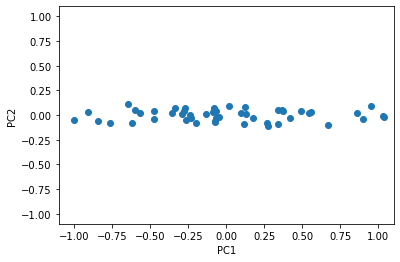

In [98]:
fig, ax = plt.subplots()

# X_pca（Xとyを合体させ、主成分分析したもの）の1列目を横軸、2列目を縦軸に取っただけ
ax.scatter(X_pca[:, 0], X_pca[:, 1])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# limitということは、座標の範囲の限界を決めているということ
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)

plt.show()

In [100]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# データセットの最初の100データのみについて考える
iris = load_iris()
X, y = iris.data[:100, :], iris.target[:100]

In [106]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [105]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

svc = SVC()

svc.fit(X_train, y_train)

# test_sizeが30%なので、出力結果のデータ数でOK
y_pred = svc.predict(X_test)

y_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0])

In [109]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [111]:
# さっきはtrain_testを分割してからSVCしたが、今度は「分割→SVC」を繰り返す
# 分割するのは、X,y自体である

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc = SVC()

cross_val_score (svc, X, y, cv = 10, scoring = 'precision')

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

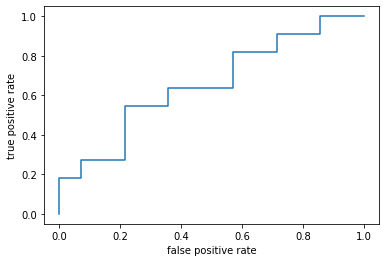

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# 最後に1/14で括って、魏陽性率のリストを表記している
fpr = np.array([0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 4, 5, 5, 6, 7, 8, 8, 8, 9, 10, 10, 11, 12, 12, 13, 14])/14

tpr = np.array([0, 1, 2, 2, 3, 3, 3, 4, 5, 6, 6, 6, 7, 7, 7, 7, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11])/11

fig, ax = plt.subplots()

ax.step(fpr, tpr)

ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')

plt.show()

In [132]:
fpr

array([0.        , 0.        , 0.        , 0.07142857, 0.07142857,
       0.21428571, 0.21428571, 0.35714286, 0.35714286, 0.57142857,
       0.57142857, 0.71428571, 0.71428571, 0.85714286, 0.85714286,
       1.        ])

In [133]:
tpr

array([0.        , 0.09090909, 0.18181818, 0.18181818, 0.27272727,
       0.27272727, 0.54545455, 0.54545455, 0.63636364, 0.63636364,
       0.81818182, 0.81818182, 0.90909091, 0.90909091, 1.        ,
       1.        ])

In [130]:
# 違う方法で、tprとfprを求めていく

from sklearn.metrics import roc_curve

# 全25人において、退会したは1、退会しなかったは0を入力する
labels = np.array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0])

# 各ユーザーの予測退会確率を入力していく
# 小数点がカンマ,になっていたミス
probs = np.array([0.98, 0.95, 0.9, 0.87, 0.85, 
                  0.8, 0.75, 0.71, 0.63, 0.55, 
                  0.51, 0.47, 0.43, 0.38, 0.35, 
                  0.31, 0.28, 0.24, 0.22, 0.19,
                  0.15, 0.12, 0.08, 0.04, 0.01])

fpr, tpr, threshold = roc_curve(labels, probs)

In [131]:


print('偽陽性率:', fpr)
print('真陽性率:', tpr)

偽陽性率: [0.         0.         0.         0.07142857 0.07142857 0.21428571
 0.21428571 0.35714286 0.35714286 0.57142857 0.57142857 0.71428571
 0.71428571 0.85714286 0.85714286 1.        ]
真陽性率: [0.         0.09090909 0.18181818 0.18181818 0.27272727 0.27272727
 0.54545455 0.54545455 0.63636364 0.63636364 0.81818182 0.81818182
 0.90909091 0.90909091 1.         1.        ]


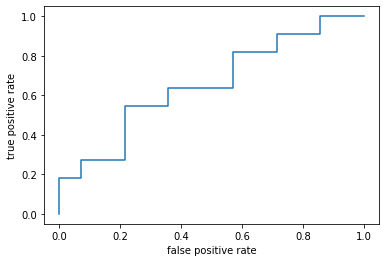

In [135]:
fig, ax = plt.subplots()
ax.step(fpr, tpr)
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')

plt.show()

In [136]:
from sklearn.metrics import roc_auc_score

roc_auc_score(labels, probs)

0.6558441558441558

In [138]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV

# クラシファイア（分類）
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

clf = DecisionTreeClassifier()

param_grid = {'max_depth': [3, 4, 5]}

# 「データ分割→結果を出す」を繰り返し、最適なパラメータを求めている
# cv でグリッドサーチ（交差検証含む）を実行する

# ちなみに交差検証であるが、対象はトレーニングデータのみ
# 後ほどy_predの計算をしているので、ここで扱っているのはトレーニングデータのみのはず

cv = GridSearchCV(clf, param_grid  = param_grid, cv= 10)

cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None, param_grid={'max_depth': [3, 4, 5]},
             pre_dispatch='2*n_jobs', re

In [139]:
cv.best_params_

{'max_depth': 3}

In [141]:
cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [142]:
y_pred = cv.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [143]:
from sklearn.datasets import load_iris

iris = load_iris()

data = iris.data

X = data[:100, [0, 2]]

In [163]:
# 自分で可視化して見やすくする工夫も重要である

df = pd.DataFrame(iris.data, iris.target, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])
df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
0,4.7,3.2,1.3,0.2
0,4.6,3.1,1.5,0.2
0,5.0,3.6,1.4,0.2
...,...,...,...,...
2,6.7,3.0,5.2,2.3
2,6.3,2.5,5.0,1.9
2,6.5,3.0,5.2,2.0
2,6.2,3.4,5.4,2.3


In [145]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [144]:
# 今どのデータを扱っているかを明確にするのは最重要

data[:10, [0, 2]]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5]])

In [164]:
dfX = pd.DataFrame(X , columns = ['sepal length', 'petal length'])
dfX

,sepal length,petal length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
95,5.7,4.2
96,5.7,4.2
97,6.2,4.3
98,5.1,3.0


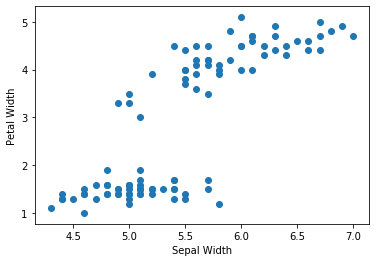

In [146]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# さっき抽出した2つのものが、Xの中では0,1になる

ax.scatter(X[:, 0], X[:, 1])
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')

plt.show()

In [149]:
from sklearn.cluster import KMeans

#n_clustersは複数形であることに注意
km = KMeans(n_clusters = 3, init = 'random', n_init= 10, random_state = 123)

# fitとpredictが合体している
y_km = km.fit_predict(X)

In [166]:
y_km

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1])

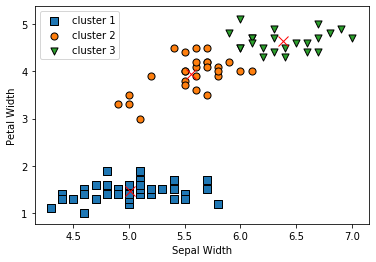

In [189]:
import numpy as np

fig, ax = plt.subplots()

# 0に分類されたXの1列目（sepal length)と2列目（petal length)　でプロットを作成する

# 行（クラスタされた花の種類）が y_km ==0 で　列が0、　行が y_km == 0で　列が1　の2つをプロットするだけ
#（つまりa,bの2変数についてプロットするようなもの)

ax.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s = 50, edgecolor = 'black', marker = 's', label = 'cluster 1')

ax.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s = 50, edgecolor = 'black', marker = 'o', label = 'cluster 2')

ax.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s = 50, edgecolor = 'black', marker = 'v', label = 'cluster 3')

# 各クラスタの中心のプロットを作成する
ax.plot(np.mean(X[y_km == 0, 0]), np.mean(X[y_km == 0, 1]), marker ='x', markersize = 10, color = 'red')

ax.plot(np.mean(X[y_km == 1, 0]), np.mean(X[y_km == 1, 1]), marker = 'x', markersize = 10, color ='red')

ax.plot(np.mean(X[y_km == 2, 0]), np.mean(X[y_km == 2, 1]), marker = 'x', markersize = 10, color = 'red')

ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')

ax.legend()
plt.show()

In [165]:
dfX

,sepal length,petal length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
95,5.7,4.2
96,5.7,4.2
97,6.2,4.3
98,5.1,3.0


In [190]:
X[y_km == 1]

array([[5.5, 4. ],
       [5.7, 4.5],
       [4.9, 3.3],
       [5.2, 3.9],
       [5. , 3.5],
       [5.9, 4.2],
       [6. , 4. ],
       [5.6, 3.6],
       [5.6, 4.5],
       [5.8, 4.1],
       [5.6, 3.9],
       [6.1, 4. ],
       [5.7, 3.5],
       [5.5, 3.8],
       [5.5, 3.7],
       [5.8, 3.9],
       [5.4, 4.5],
       [5.6, 4.1],
       [5.5, 4. ],
       [5.5, 4.4],
       [5.8, 4. ],
       [5. , 3.3],
       [5.6, 4.2],
       [5.7, 4.2],
       [5.7, 4.2],
       [5.1, 3. ],
       [5.7, 4.1]])

In [175]:
X[y_km == 1 , 0]

array([5.5, 5.7, 4.9, 5.2, 5. , 5.9, 6. , 5.6, 5.6, 5.8, 5.6, 6.1, 5.7,
       5.5, 5.5, 5.8, 5.4, 5.6, 5.5, 5.5, 5.8, 5. , 5.6, 5.7, 5.7, 5.1,
       5.7])

In [179]:
X[y_km == 1, 1]

array([4. , 4.5, 3.3, 3.9, 3.5, 4.2, 4. , 3.6, 4.5, 4.1, 3.9, 4. , 3.5,
       3.8, 3.7, 3.9, 4.5, 4.1, 4. , 4.4, 4. , 3.3, 4.2, 4.2, 4.2, 3. ,
       4.1])

In [181]:
X[y_km == 0]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.4],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4]])

In [168]:
X[y_km == 0, 1]

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

In [180]:
X[y_km == 0, 0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

In [170]:
X[y_km == 1, 1]

array([4. , 4.5, 3.3, 3.9, 3.5, 4.2, 4. , 3.6, 4.5, 4.1, 3.9, 4. , 3.5,
       3.8, 3.7, 3.9, 4.5, 4.1, 4. , 4.4, 4. , 3.3, 4.2, 4.2, 4.2, 3. ,
       4.1])

In [193]:
# agglomerative：塊状の（クラスタを集めていくため）
# 階層的クラスタリングのモジュールをインポート
from sklearn.cluster import AgglomerativeClustering

# インスタンスに作成
ac = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')

labels = ac.fit_predict(X)

labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0], dtype=int64)

In [206]:
X[0:30]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6]])

In [195]:
import numpy as np

from scipy.cluster.hierarchy import dendrogram

# 子クラスタとの関係を抽出
children = ac.children_

# クラスタ間の距離を抽出
distance = np.arange(children.shape[0])

# observations：観測
# 各データのクラスタ番号
no_of_observations = np.arange(2, children.shape[0]+2)

In [207]:
# pandasのheadよりも簡単にできる

children

array([[  0,  17],
       [  1,  37],
       [ 12,  45],
       [  4,  49],
       [  6,  47],
       [  5,  20],
       [  9,  34],
       [ 19,  21],
       [ 39, 107],
       [ 38,  42],
       [ 10,  31],
       [ 11,  30],
       [ 27,  32],
       [ 25,  26],
       [ 43, 113],
       [ 53,  89],
       [ 95,  96],
       [ 78,  85],
       [ 63,  73],
       [101, 103],
       [  7, 106],
       [ 41, 109],
       [ 16,  36],
       [ 48, 112],
       [ 46, 114],
       [ 29, 111],
       [ 57,  93],
       [ 80,  81],
       [ 67,  99],
       [ 62,  71],
       [ 54,  58],
       [  3, 104],
       [100, 108],
       [ 35,  40],
       [ 82,  92],
       [ 88,  94],
       [ 55,  66],
       [ 91, 118],
       [ 65,  75],
       [ 84,  90],
       [ 68,  87],
       [ 76,  86],
       [  2, 102],
       [  8, 121],
       [ 33, 122],
       [ 23, 124],
       [ 28, 123],
       [119, 120],
       [ 69, 115],
       [116, 128],
       [ 64,  79],
       [ 15,  18],
       [105,

In [208]:
# 0なら行列数

children.shape[0]

99

In [204]:
# 1なら列数

children.shape[1]

2

In [199]:
no_of_observations

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100])

In [213]:
# hstackで横結合

linkage_matrix = np.hstack((children, distance[:, np.newaxis], no_of_observations[:, np.newaxis])).astype(float)

In [214]:
linkage_matrix

array([[  0.,  17.,   0.,   2.],
       [  1.,  37.,   1.,   3.],
       [ 12.,  45.,   2.,   4.],
       [  4.,  49.,   3.,   5.],
       [  6.,  47.,   4.,   6.],
       [  5.,  20.,   5.,   7.],
       [  9.,  34.,   6.,   8.],
       [ 19.,  21.,   7.,   9.],
       [ 39., 107.,   8.,  10.],
       [ 38.,  42.,   9.,  11.],
       [ 10.,  31.,  10.,  12.],
       [ 11.,  30.,  11.,  13.],
       [ 27.,  32.,  12.,  14.],
       [ 25.,  26.,  13.,  15.],
       [ 43., 113.,  14.,  16.],
       [ 53.,  89.,  15.,  17.],
       [ 95.,  96.,  16.,  18.],
       [ 78.,  85.,  17.,  19.],
       [ 63.,  73.,  18.,  20.],
       [101., 103.,  19.,  21.],
       [  7., 106.,  20.,  22.],
       [ 41., 109.,  21.,  23.],
       [ 16.,  36.,  22.,  24.],
       [ 48., 112.,  23.,  25.],
       [ 46., 114.,  24.,  26.],
       [ 29., 111.,  25.,  27.],
       [ 57.,  93.,  26.,  28.],
       [ 80.,  81.,  27.,  29.],
       [ 67.,  99.,  28.,  30.],
       [ 62.,  71.,  29.,  31.],
       [ 5

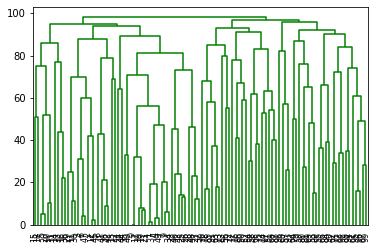

In [215]:
fig, ax = plt.subplots()

dendrogram(linkage_matrix, labels = np.arange(100), leaf_font_size = 8, color_threshold = np.inf)
plt.show()